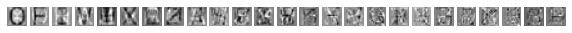

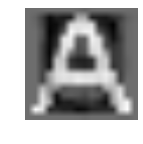

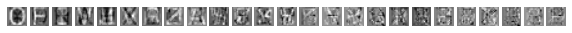

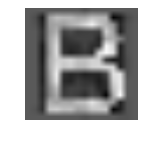

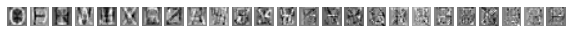

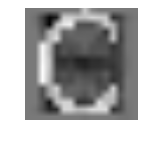

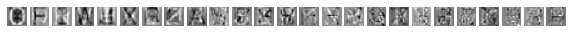

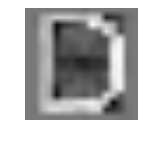

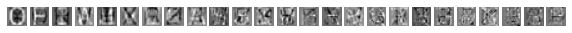

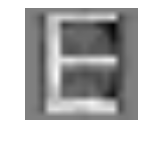

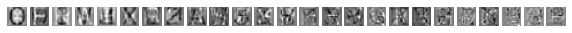

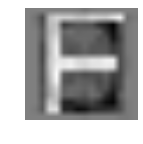

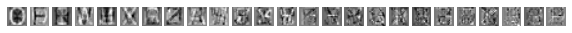

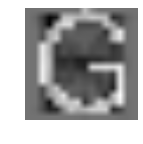

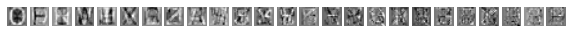

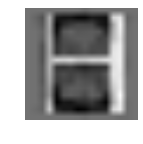

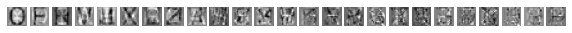

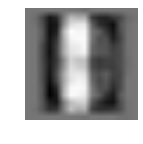

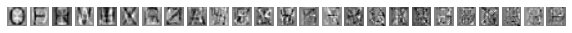

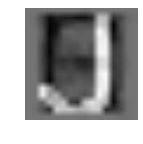

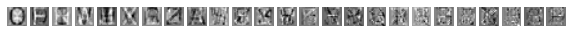

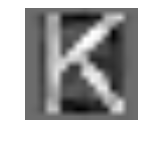

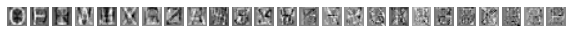

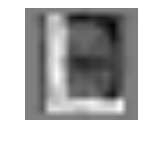

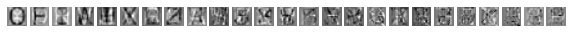

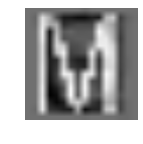

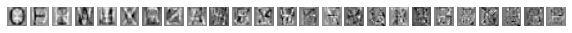

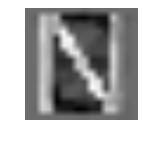

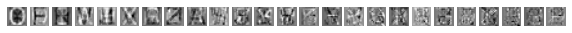

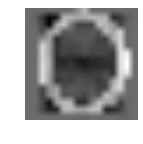

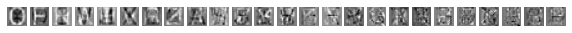

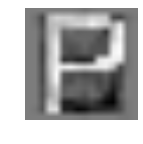

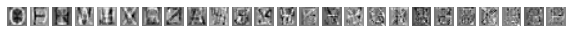

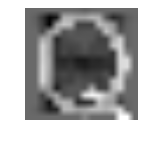

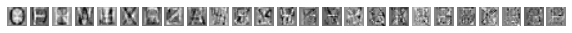

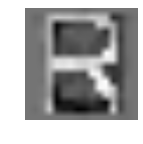

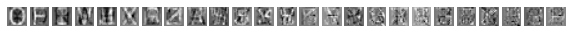

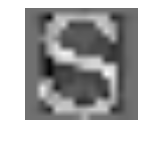

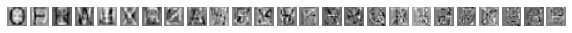

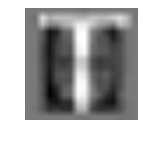

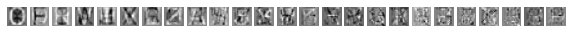

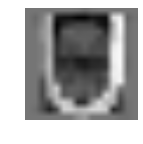

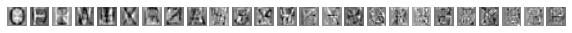

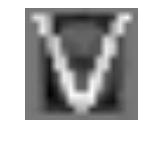

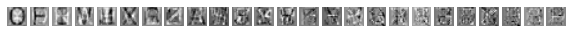

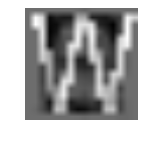

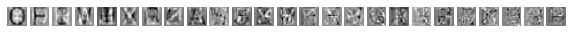

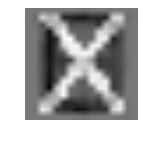

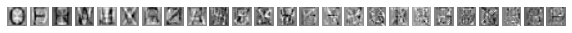

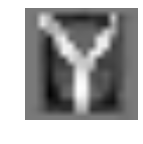

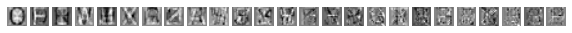

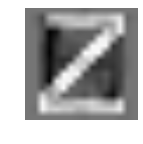

In [166]:
#%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from __future__ import print_function, division
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


edge_pix_dict = {'A':137, 'B':130, 'C':125, 'D':140, 'E':118, 'F':113, 'G':145, 'H':145, \
                'I':145, 'J':85, 'K':125, 'L':105, 'M':180, 'N':140, 'O':155, 'P':125, \
                'Q':170, 'R':130, 'S':113, 'T':120, 'U':150, 'V':135, 'W':220, 'X':125, \
                'Y':119, 'Z':115}


def make_let_im(let_file, dim = 16, y_lo = 70, y_hi = 220, x_lo = 10, \
               x_hi = 200, edge_pix = 148, plot_let = False):
    init_im = mpimg.imread(let_file)
    im = init_im[y_lo:y_hi,x_lo:x_hi]
    im[:,edge_pix:] = 1
    im_2d = im[:,:,0]
    x = np.arange(im_2d.shape[1])
    y = np.arange(im_2d.shape[0])
    f2d = interp2d(x, y, im_2d)
    x_new = np.linspace(0, im_2d.shape[1], 16)
    y_new = np.linspace(0, im_2d.shape[0], 16)
    let_im = f2d(x_new, y_new)
    let_im_flat = np.concatenate(let_im)
    if plot_let == True:
        plt.figure()
        plt.title('Interpolated Letter')
        plt.grid('off')
        plt.imshow(let_im, cmap = 'binary')
        plt.show()
    return let_im, let_im_flat
parser = argparse.ArgumentParser()
parser.add_argument('-let_idx', type = int) 
parser.add_argument('-n_comp', type = int)
args = parser.parse_args()
let_idx = args.let_idx
n_comp = args.n_comp
    
A, A_flat = make_let_im('letterA.png', edge_pix = edge_pix_dict['A'])
B, B_flat = make_let_im('letterB.png', edge_pix = edge_pix_dict['B'])
C, C_flat = make_let_im('letterC.png', edge_pix = edge_pix_dict['C'])
D, D_flat = make_let_im('letterD.png', edge_pix = edge_pix_dict['D'])
E, E_flat = make_let_im('letterE.png', edge_pix = edge_pix_dict['E'])
F, F_flat = make_let_im('letterF.png', edge_pix = edge_pix_dict['F'])
G, G_flat = make_let_im('letterG.png', edge_pix = edge_pix_dict['G'])
H, H_flat = make_let_im('letterH.png', edge_pix = edge_pix_dict['H'])
I, I_flat = make_let_im('letterI.png', edge_pix = edge_pix_dict['I'])
J, J_flat = make_let_im('letterJ.png', edge_pix = edge_pix_dict['J'])
K, K_flat = make_let_im('letterK.png', edge_pix = edge_pix_dict['K'])
L, L_flat = make_let_im('letterL.png', edge_pix = edge_pix_dict['L'])
M, M_flat = make_let_im('letterM.png', edge_pix = edge_pix_dict['M'])
N, N_flat = make_let_im('letterN.png', edge_pix = edge_pix_dict['N'])
O, O_flat = make_let_im('letterO.png', edge_pix = edge_pix_dict['O'])
P, P_flat = make_let_im('letterP.png', edge_pix = edge_pix_dict['P'])
Q, Q_flat = make_let_im('letterQ.png', edge_pix = edge_pix_dict['Q'])
R, R_flat = make_let_im('letterR.png', edge_pix = edge_pix_dict['R'])
S, S_flat = make_let_im('letterS.png', edge_pix = edge_pix_dict['S'])
T, T_flat = make_let_im('letterT.png', edge_pix = edge_pix_dict['T'])
U, U_flat = make_let_im('letterU.png', edge_pix = edge_pix_dict['U'])
V, V_flat = make_let_im('letterV.png', edge_pix = edge_pix_dict['V'])
W, W_flat = make_let_im('letterW.png', edge_pix = edge_pix_dict['W'])
X, X_flat = make_let_im('letterX.png', edge_pix = edge_pix_dict['X'])
Y, Y_flat = make_let_im('letterY.png', edge_pix = edge_pix_dict['Y'])
Z, Z_flat = make_let_im('letterZ.png', edge_pix = edge_pix_dict['Z'])

X = np.array([A_flat,B_flat,C_flat,D_flat,E_flat,F_flat,G_flat,\
             H_flat,I_flat,J_flat,K_flat,L_flat,M_flat,N_flat,\
             O_flat,P_flat,Q_flat,R_flat,S_flat,T_flat,U_flat,V_flat,\
             W_flat,X_flat,Y_flat,Z_flat])


def alphabet_pca(X, n_comp):
    pca = PCA(n_comp)  
    Xproj = pca.fit_transform(X)
    pca_comps = pca.components_
    return pca, Xproj, pca_comps

def show_pca_im(Xproj, pca_comps, dim = 16, n_comp, let_idx):
    dig_im = np.zeros((dim, dim))
    coeffs = Xproj[let_idx]
    f, axes = plt.subplots(1, n_comp, figsize = (10, 2), subplot_kw=dict(xticks=[], yticks=[]))
    for i in range(n_comp):
        axes[i].imshow(coeffs[i]*pca_comps[i].reshape((16, 16)), cmap='binary')
    for i in range(n_comp):
        dig_im += coeffs[i]*pca_comps[i].reshape((16, 16))
    fig, ax = plt.subplots(1, 1, figsize = (2, 2))
    ax.imshow(dig_im, cmap='binary')
    ax.grid(False)
    ax.axis('off')
    plt.show()

pca, XProj, pca_comps = alphabet_pca(X)
for i in range(0,26):
    show_pca_im(XProj, pca_comps, let_idx = i)

(275, 150, 4)


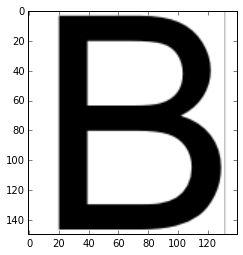

(150, 140, 4)


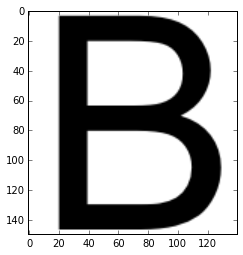

(150, 140, 4)


ValueError: x and y must have equal lengths for non rectangular grid

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc
import matplotlib.image as mpimg
import numpy as np

# The key import of this cell:
from scipy.interpolate import interp2d

im = mpimg.imread('letterB.png')
print(im.shape)
im = im[70:220,10:210]#for letterB its 30
plt.grid('off')
plt.imshow(im, cmap = 'gray')
plt.show()

print(im.shape)
im[:,130:] = 1#slices the black
#print(im[:,125])
plt.grid('off')
plt.imshow(im, cmap = 'gray')
plt.show()
print(im.shape)
# Note the 0th dimension is y, and 1st dimension is x -- silly convention!
#x = np.arange(im.shape[1])
y = np.arange(im.shape[0])
#
f2d = interp2d(x, y, im)

# x_new = np.linspace(0, im.shape[1], 64)
# y_new = np.linspace(0, im.shape[0], 64)

# print(x_new.shape)

# im_new = f2d(x_new, y_new)
# print(im_new.shape)